# CE-40717: Machine Learning

## HW7-Regression

[<img src="./images/ML2021S-HW7.jpg" width=1100>](https://quera.ir/assignment/30615/get_pdf_file)

---
---

### Please fill this part


1.   Full Name: 
2.   Student Number: 

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/ML2021S-HW7-data.csv")

# implement the split part
train = dataset.sample(frac=0.8, random_state=200)    # Random state is a seed value
test = dataset.drop(train.index)

x_train = train['X'].values
y_train = train['Y'].values

x_test = test['X'].values
y_test = test['Y'].values

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
def mean_squared_error(pred, truth):
    return np.square(np.subtract(pred,truth)).mean()

In [4]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = x_train
A.shape = len(x_train), 1
A = np.hstack((A, np.ones((400,1))))
m = np.linalg.inv(A.T @ A) @ A.T @ y_train

In [5]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 1.0281628189482181
MSE test error: 0.2894295693002539


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", grid=False)

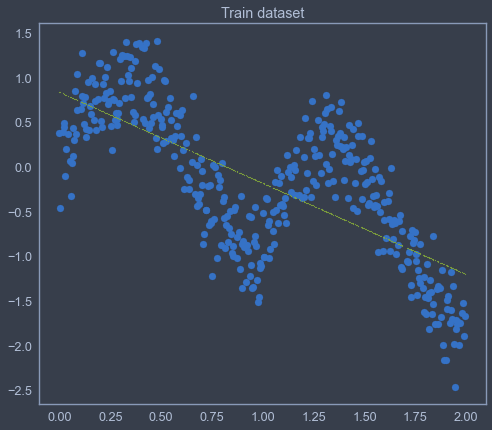

In [7]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset");

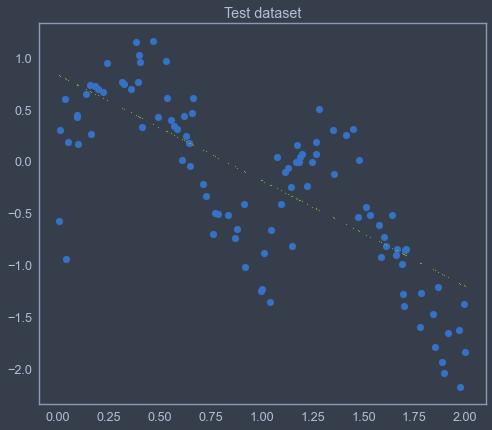

In [8]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset");

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

As you can see, the dataset wont fit to linear models. So we have to think of non-linear models.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, because it considers a non-linear (non-parametric) model.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [9]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        denominator = (-2 * hyperparameter * hyperparameter)
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/denominator)
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [10]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    train_Y.shape = train_Y.shape[0],1
    theta = np.linalg.pinv(X.T@(W @ X))@(X.T@(W @ train_Y))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [11]:
hyperparameter = 0.1

predicted_test = [predict(x_train, y_train, query, hyperparameter)[0,0] for query in x_test]
error = mean_squared_error(predicted_test, y_test)
print(f"MSE test error: {error}")

MSE test error: 0.09402300587040618


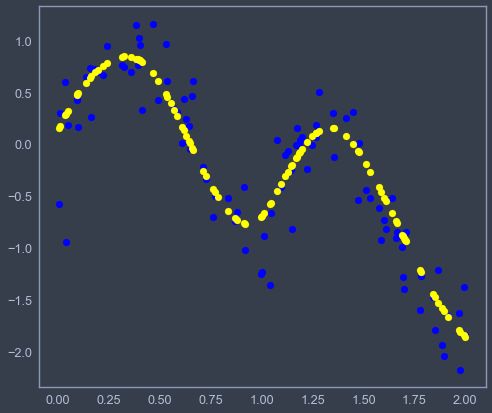

In [12]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow");

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, extremely better.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, becuase its basically another version of the previous model.

### Part10:
Implementing the `KNN model`.

In [13]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2)    # implement the distance function
        return distance

    def return_nn_ids(self, x):
        x = np.reshape(x, (1,1))
        distances = np.linalg.norm(self.X - x, axis=1)
        indices = distances.argsort()[:self.k]    # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = (self.Y[neareest_indices]).mean()
        return predicted_y

In [14]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(predicted_y, y_test)
    return error, predicted_y

In [15]:
k = 10
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09558160823802997


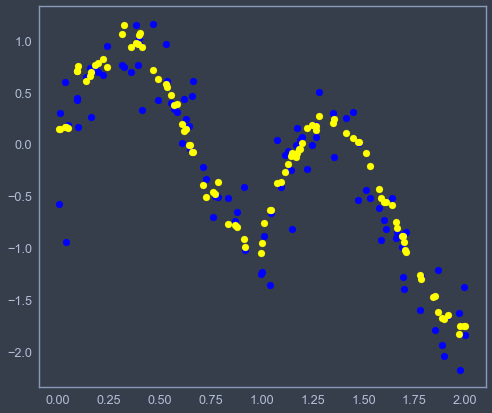

In [16]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow");

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, just as the prevous one.